In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set()

%matplotlib inline  

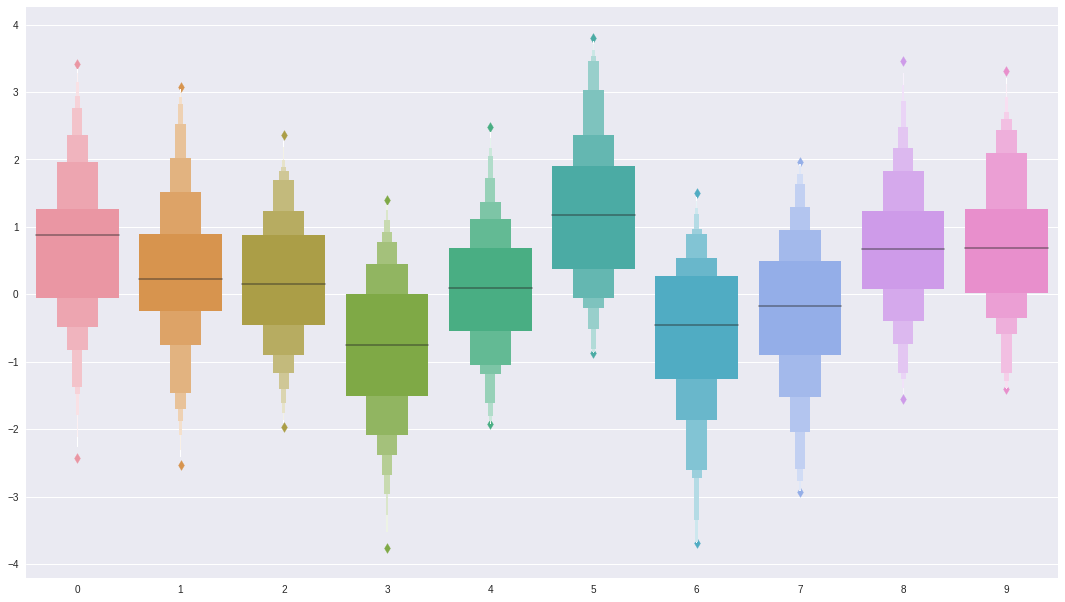

In [18]:
N_bandits = 10
reward_min = -1
reward_max = 1
reward_dispersion_min = 1
reward_dispersion_max = 1

Params = []
for i in range (0,N_bandits):
    mu = np.random.uniform(reward_min,reward_max,1)
    sigma = np.random.uniform(reward_dispersion_min,reward_dispersion_max,1)
    Params.append((mu,sigma))
    
    
def GetBanditResult(i, n=1):
    res = np.random.normal(Params[i][0],Params[i][1],n)
    if n==1:
        res=res[0]
    return res
    
    
N=100

d = [GetBanditResult(i,N) for i in range (0,N_bandits)]


fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
# Show each distribution with both violins and points
sns.lvplot(data=d)


5
5
5


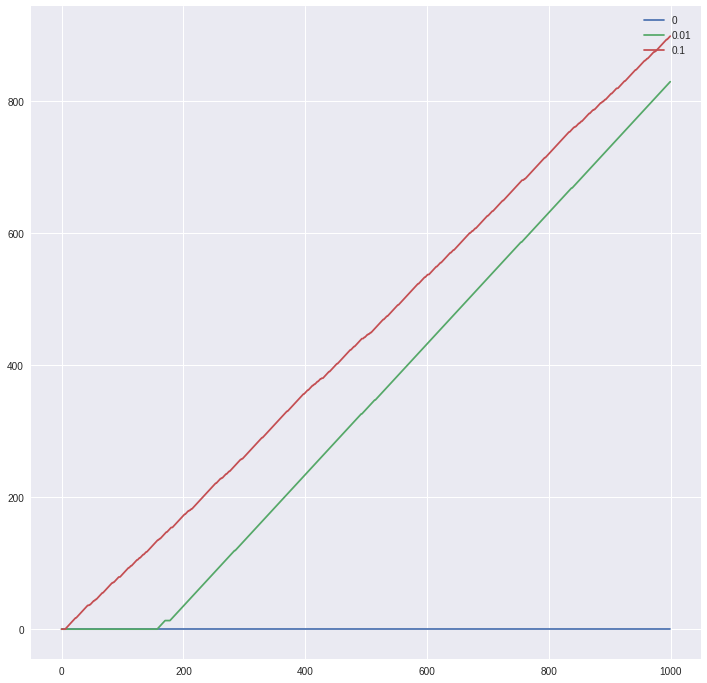

In [34]:
Max_steps = 1000

def Game(max = Max_steps, greedy = 0):
    Q = [0 for i in range(N_bandits)]
    
    actions_counts = [0 for i in range(N_bandits)]
    optimal_action = np.argmax([p[0] for p in Params])
    print(optimal_action)
    optimal_count = 0
    results = []
    sum_reward = 0
    for n in range(Max_steps):
        
        if np.random.uniform(0,1)>greedy:     
            action = np.argmax(Q)
        else:
            action = np.random.randint(0,10)
        reward = GetBanditResult(action)
        Q[action] = (Q[action]*(actions_counts[action])+reward)/(actions_counts[action]+1)
    
        actions_counts[action] +=1
        sum_reward += reward
        avg_reward = sum_reward/(n+1)
        optimal_count += 1 if action==optimal_action else 0
        results.append((n,action,reward,sum_reward.copy(),avg_reward.copy(),optimal_count,Q.copy()))
    
    
    
    
    return pd.DataFrame.from_records(results,columns=["step","action","reward","all_reward","avg_reward","optimal_count","Q"])
        

greedys = [0,0.01,0.1]
game_results = []
for g in greedys:
    game_results.append(Game(greedy=g))


#margin = 0.3
plt.figure(figsize=(12,12))

for i in range(len(greedys)):
    plt.plot(game_results[i]["step"],game_results[i]["optimal_count"],  alpha=1, label=greedys[i])
    

    #plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')
#plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
#plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right', prop={'size': 10})
#plt.title('True manifold and noised data')
#plt.xlabel('x')
#plt.ylabel('y')



plt.show()

In [35]:
game_results[2]

,step,action,reward,all_reward,avg_reward,optimal_count,Q
0,0,0,-1.291608,-1.291608,-1.291608,0,"[-1.29160777494, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
1,1,1,-0.223498,-1.515106,-0.757553,0,"[-1.29160777494, -0.223498278172, 0, 0, 0, 0, ..."
2,2,2,-0.952334,-2.467440,-0.822480,0,"[-1.29160777494, -0.223498278172, -0.952334034..."
3,3,3,-0.530441,-2.997881,-0.749470,0,"[-1.29160777494, -0.223498278172, -0.952334034..."
4,4,2,-1.788788,-4.786669,-0.957334,0,"[-1.29160777494, -0.223498278172, -1.370561018..."
5,5,4,-0.918686,-5.705355,-0.950893,0,"[-1.29160777494, -0.223498278172, -1.370561018..."
6,6,0,0.768607,-4.936748,-0.705250,0,"[-0.261500158506, -0.223498278172, -1.37056101..."
7,7,5,1.579481,-3.357266,-0.419658,1,"[-0.261500158506, -0.223498278172, -1.37056101..."
8,8,5,1.834982,-1.522284,-0.169143,2,"[-0.261500158506, -0.223498278172, -1.37056101..."
9,9,5,-0.202234,-1.724518,-0.172452,3,"[-0.261500158506, -0.223498278172, -1.37056101..."
